<h2>FIN5615 Project #4
    <p class="text-primary">S&P 100 Returns</p>
</h2>

<div class = "alert alert-block alert-danger">
    <b>Due Date</b>: October 26th, 2020 11:59PM EST
</div>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will examine the historical return performance of the 100 component stocks that make up the S&P 100 index. We will also explore their correlations and identify pairs of stocks that are most highly correlated and relatively uncorrelated.
    </div>
</div>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Data</b>
    </div>
    <div class = "panel-body"> 
    The data for this project includes the historical daily prices, from the stock's inception to June 30th 2020, for each of the 100 component stocks in the S&P 100 index. In the folder "SP100", you will find one CSV file for each of the component stocks.
    <br><br>For this project, we will be focusing only on the historical closing prices listed under column "Adj Close" (adjusted for stock splits). The ticker symbols and company names of each of the stocks are included in a separate file "_SP100.csv", which you can also find the folder "SP100".
    <br><br>Download and place the entire "SP100" folder in the "Data" folder of your working directory. Remember to read in the datasets starting with the relative file path: <code>'../../Data/SP100'</code>.
    </div>
</div>

<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Assignmnet_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Add any additional libraries that you plan on using to the import statements in the code block below.
</div>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Read in each of the CSV files for the S&P 100 stocks in a dictionary for us to easily reference and manipulate the data.
    <br>
    <ul>
        <li>Start by reading in the companies and their stock ticker symbols into a dataframe called <code>sp100</code>, with the "Ticker" column as the index.</li>
        <li>Next, create a dictionary called <code>stock_frames</code>. This will serve as a container to store all the historical price data for the component stocks.</li>
        <li>Read in the historical price data for all stocks in <code>sp100</code> as dataframes and store them in <code>stock_frames</code> with the stock's ticker as the key. </li>
        <li>For this project, we will only need the columns "Date" and "Adj Close" so limit to just these two columns when reading in the CSV file, with the "Date" column as the dataframe's index. </li>
    </ul>
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

<div class = "alert alert-block alert-info">
    <b>Hint</b>: When reading in the CSV files, you may want to use a loop to iterate the index of *sp100* that was created earlier.
</div>

In [20]:
sp100 = pd.read_csv('/Users/nicholasirrrer/Desktop/Skool/SP100/_SP100.csv', usecols = ['Ticker'])
path = '/Users/nicholasirrrer/Desktop/Skool/SP100'

print(sp100)

#pulled the data directly from my desktop as there was issues when trying to pull directly from jupyter

   Ticker
0    AAPL
1    ABBV
2     ABT
3     ACN
4    ADBE
..    ...
94     VZ
95    WBA
96    WFC
97    WMT
98    XOM

[99 rows x 1 columns]


In [21]:
stock_frames = {}
for ticker in sp100.loc[:,'Ticker'] :
    stock_frames[ticker] = pd.read_csv(f'{path}/{ticker}.csv', usecols =['Date','Adj Close'], index_col = ['Date'])

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    An issue with our data is that component stocks of the S&P 100 do not all have the same number of historical observations.
    <br><br>To help remedy this, iterate through the <code>stock_frames</code> dictionary and for each dataframe, limit the historical price observations to the period ranging from 7/6/2015 to 6/30/2020, which spans 1257 trading days. 
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [22]:
stock_prices = pd.concat(stock_frames.values(), axis = 1, join = 'inner')
stock_prices.columns = sp100['Ticker']

In [23]:
print(stock_prices)

Ticker          AAPL       ABBV        ABT         ACN        ADBE        AIG  \
Date                                                                            
20150706  116.122704  54.396431  44.941250   89.012009   80.500000  54.500534   
20150707  115.837006  54.667538  45.365906   90.237366   80.589996  54.817768   
20150708  112.961594  53.949913  44.498520   89.268074   79.989998  53.892525   
20150709  110.657570  54.197105  44.444317   89.386940   80.470001  54.421230   
20150710  113.615921  55.201782  45.112915   90.328812   80.589996  55.179031   
...              ...        ...        ...         ...         ...        ...   
20200624  360.059998  95.139999  87.300003  201.839996  431.679993  30.299999   
20200625  364.839996  96.989998  89.620003  217.320007  436.950012  31.260000   
20200626  353.630005  96.129997  88.709999  212.470001  426.920013  29.709999   
20200629  361.779999  96.440002  89.010002  212.720001  424.200012  30.680000   
20200630  364.799988  98.180

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Reorganize the data by creating an 2-d array called <code>stock_prices</code> to store each stock's historical prices, where axis-0 of the array (rows) is each day of the historical period and axis-1 of the array (columns) are the S&P 100 stocks. 
    <br><br>Confirm that at the end of your code, the shape of <code>stock_prices</code> should be <code>(1257, 99)</code>. 
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [24]:
stock_prices_arr = stock_prices.values
print(stock_prices_arr.shape)

#_# checked

(1257, 99)


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
        Using the array <code>stock_prices</code>, calculate the compounding daily returns (expressed as a percentage) and store them in another array called <code>stock_returns</code>. Recall that:
    <br><br>
    $$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) * 100$$
    <br>Confirm that after the calculation, the shape of <code>stock_returns</code> should be <code>(1256, 99)</code>. 
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [25]:
stock_returns = np.log(1. + stock_prices.pct_change()).dropna()
print(stock_returns.shape)

#_# checked

(1256, 99)


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Using <code>stock_returns</code>, calculate the average observed daily returns across the S&P 100 stocks for each day in our historical period. Store this result in another array called <code>daily_returns</code>. Check that the shape of <code>daily_returns</code> is a 1-d array with length 1256.
    <br><br>Plot <code>daily_returns</code> in a line plot. Remember to provide a title, axis labels, and adjust the figure size as neccessary. Comment on any noteworthy observations from the plot, and any possible connections to real-world events.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [26]:
daily_returns= stock_returns.mean(axis=1)
print(daily_returns)

Date
20150707    0.007087
20150708   -0.015601
20150709    0.002409
20150710    0.012164
20150713    0.011373
              ...   
20200624   -0.029244
20200625    0.012108
20200626   -0.027176
20200629    0.017780
20200630    0.012888
Length: 1256, dtype: float64


In [27]:
print(daily_returns.shape)

#_# checked

(1256,)


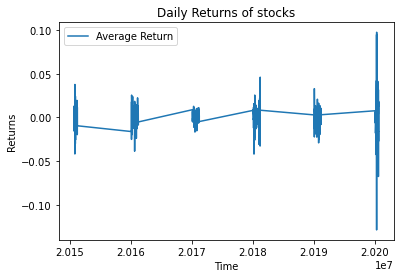

In [28]:
plt.plot(daily_returns)
plt.title('Daily Returns of stocks')
plt.legend(['Average Return'])
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

In [29]:
#In the beginning of the year, stock returns fluctuate the most as shown in the graph. This is generally due to excss cash being put into the stock market after tax season.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    Using <code>stock_returns</code>, calculate the average daily returns over the historical period for the S&P 100 stocks. Store this result in another array called <code>avg_returns</code>. Check that the shape of <code>avg_returns</code> is a 1-d array with length 99.
    <br><br>Plot the average returns in <code>avg_returns</code> on a bar plot, sorted by highest to lowest returns. Provide an appropriate title, axis labels, and adjust the figure size for the plot as needed.
    <br><br>Which stock experienced the highest average daily returns over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>
<div class = "alert alert-block alert-info">
    <b>Hint</b>: The matplotlib function <b>plt.barh<b> gives a bar plot oriented horizontally.
</div>

In [30]:
average_returns = stock_returns. mean (axis = 0)
print(average_returns)

Ticker
AAPL    0.000911
ABBV    0.000470
ABT     0.000565
ACN     0.000701
ADBE    0.001344
          ...   
VZ      0.000305
WBA    -0.000461
WFC    -0.000493
WMT     0.000500
XOM    -0.000320
Length: 99, dtype: float64


In [31]:
print(average_returns.shape)

(99,)


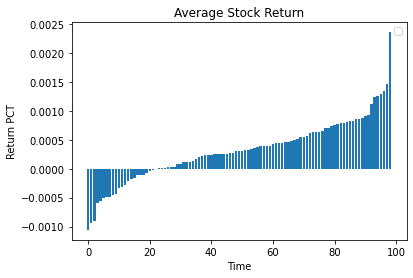

In [32]:
plt.title('Average Stock Return')
plt.legend(['Average Return'])
plt.xlabel('Time')
plt.ylabel('Return PCT')
plt.bar(range(99),average_returns.sort_values())
plt.show()

In [33]:
print(np.argmax(average_returns))
print('-')
print(average_returns.iloc[[71]])

71
-
Ticker
NVDA    0.002361
dtype: float64


In [34]:
print(np.argmin(average_returns))
print('-')
print(average_returns.iloc[[82]])

82
-
Ticker
SLB   -0.001058
dtype: float64


In [35]:
#_# Apple had the highest stock return, and XOM had the lowest return in. This makes sense as Apple stock has been continuing to grow for quite a long time.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 7</b>
    </div>
    <div class = "panel-body"> 
    Using stock_returns, calculate the standard deviation of daily returns over the historical period for the S&P 100 stocks. Store this result in another array called <code>std_returns</code>. Check that the shape of <code>std_returns</code> is a 1-d array with length 99.
    <br><br>Which stock experienced the highest volatility over the historical period? Which stock had the lowest? Provide some comments on whether those observations make sense and why.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [36]:
stdev_returns = np.std(stock_returns)
print(standard_returns.shape)

NameError: name 'standard_returns' is not defined

In [37]:
print(np.argmin(stdev_returns))
print('-')
print(stdev_returns.iloc[[94]])

94
-
Ticker
VZ    0.012234
dtype: float64


In [38]:
print(np.argmax(stdev_returns))
print('-')
print(stdev_returns.iloc[[73]])

73
-
Ticker
OXY    0.033884
dtype: float64


In [39]:
#_# The highest volatility stock was VZ and the lowest volatility stock was OXY. These observations are likely due to the fluctuation in recent years of tech stocks.

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 8</b>
    </div>
    <div class = "panel-body"> 
    Plot a scatter plot of the standard deviation of returns on the horizontal axis (X) and the average returns on the vertical axis (Y). Provide the plot with a title and axis labels.
    <br><br>What can we conclude from the plot? Are there any noteworthy patterns or observations?
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

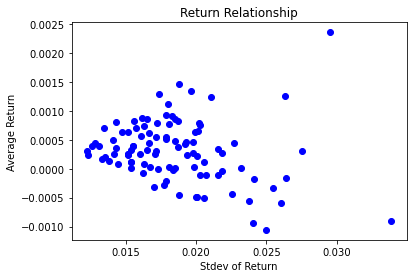

<Figure size 7200x3600 with 0 Axes>

In [40]:
plt.plot(stdev_returns, average_returns, 'o', color='blue')
plt.title('Return Relationship')
plt.xlabel('Stdev of Return')
plt.ylabel('Average Return')
plt.figure(figsize=(100,50))
plt.show()

In [41]:
#_# there is a clear downward correlation in the stdev and average returns however this correlation is not definitive. 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 9</b>
    </div>
    <div class = "panel-body"> 
    Use the arrays <code>avg_returns</code> and <code>std_returns</code> to calculate the historical sharpe ratio over the historical period. Assume an annual risk-free rate of 1%. Store this result in another array called <code>sharpe_ratio</code>.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

In [42]:
print(average_returns.shape)
print(stdev_returns.shape)

(99,)
(99,)


In [43]:
sharpe_ratio = (average_returns-.01)/stdev_returns
print(sharpe_ratio.shape)

(99,)


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 10</b>
    </div>
    <div class = "panel-body"> 
    Calculate the correlation matrix for daily returns of the S&P 100 component stocks in <code>stock_returns</code>. Verify that the shape of the calculated matrix is <code>(99, 99)</code>. 
    <br><br>Store the correlation matrix in a dataframe called <code>corr_returns</code>, and set the stock tickers as both the index and columns of the dataframe. 
    <p style="text-align:right;">[10pts]</p>
    </div>
</div>

In [44]:
corr_returns = stock_returns.corr()
print(corr_returns.shape)

(99, 99)


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 11</b>
    </div>
    <div class = "panel-body"> 
    A heatmap is a graphical representation of data that uses a system of color-coding to represent the relative magnitude of a set of data. We can create heatmaps using another external library called <b>seaborn</b>, and using the code snippet below
    <br>
    <code>
    import seaborn as sns
    sns.heatmap(corr_returns)
    plt.show()
    </code>
    <br>Plot the heatmap for <code>corr_returns</code>. Rremember to provide a title to the plot and adjust the figure size as neccessary.
    <p style="text-align:right;">[5pts]</p>
    </div>
</div>

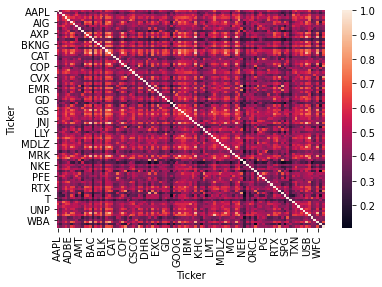

In [45]:
import seaborn as sns
sns.heatmap(corr_returns)
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 12</b>
    </div>
    <div class = "panel-body"> 
    From the correlation matrix <code>corr_returns</code>, identify the pair of stocks that are <i>most</i> positively correlated and the pair that are <i>most</i> uncorrelated. 
    <br><br>Comment on whether it is reasonable for the identified pairs of stocks to be positively correlated or uncorrelated, and propose a reason as to why for each of the two pairs of stocks.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [46]:
unstacked = corr_returns.unstack()
max_corr = unstacked.sort_values()

high_correlation = max_corr[-100]
low_correlation = max_corr[0]

print(high_correlation)
print(low_correlation)
print('-')
print(max_corr)

0.9287737769548196
0.10660500968647431
-
Ticker  Ticker
DUK     NFLX      0.106605
NFLX    DUK       0.106605
WMT     OXY       0.115948
OXY     WMT       0.115948
GILD    SPG       0.124957
                    ...   
NFLX    NFLX      1.000000
NKE     NKE       1.000000
NVDA    NVDA      1.000000
IBM     IBM       1.000000
XOM     XOM       1.000000
Length: 9801, dtype: float64


In [ ]:
#_# It is reasonable for the pairs to be positively correlated. The SP100 has been on an upward trend recently